In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from os import listdir
from os.path import isdir
from numpy import savez_compressed
from numpy import asarray
from numpy import load
from numpy import expand_dims
from random import choice
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [113]:
df1 = pd.read_excel('Train_Dataset.xlsx',header=None)
df2 = pd.read_excel('Test_Dataset.xlsx',header=None)

In [114]:
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1


In [115]:
df2.head(5)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,-0.978189,0.710088,-0.829166,0.179836,0.213549,-0.174499,-0.141603,0.082213,0.080289,-0.040281,...,-0.898618,-0.910135,-0.925555,-0.878335,-0.912158,-0.904237,-0.947651,-0.947223,-0.952495,1
1,-0.956427,0.736591,-0.810389,0.177924,0.226957,-0.158520,-0.120338,0.030130,-0.000590,-0.121863,...,-0.929851,-0.911448,-0.923216,-0.911816,-0.920951,-0.954833,-0.963964,-0.924532,-0.950519,1
2,-0.982409,0.711293,-0.796207,0.201274,0.215307,-0.157286,-0.191578,0.002043,0.039717,-0.052825,...,-0.914425,-0.915563,-0.932089,-0.927137,-0.921729,-0.949606,-0.960689,-0.926864,-0.955616,1
3,-0.986997,0.725616,-0.841995,0.455185,0.024101,-0.301596,-0.052146,0.089462,-0.014578,-0.071108,...,-0.836533,-0.842375,-0.874840,-0.843406,-0.842403,-0.707724,-0.812811,-0.723752,-0.895866,1
4,-0.990537,0.715020,-0.831138,0.415829,0.170204,-0.197180,-0.004549,0.156982,0.081569,-0.026335,...,-0.919978,-0.911977,-0.891032,-0.897665,-0.883679,-0.896315,-0.942841,-0.917079,-0.944649,1


In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 993 entries, 0 to 992
Columns: 561 entries, 0 to 560
dtypes: float64(560), int64(1)
memory usage: 4.3 MB


In [117]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487 entries, 0 to 486
Columns: 561 entries, 0 to 560
dtypes: float64(560), int64(1)
memory usage: 2.1 MB


In [118]:
df1.rename(columns = {560:'Target'}, inplace=True)
df2.rename(columns = {560:'Target'}, inplace=True)

In [119]:
print(df1['Target'].unique())
print(df2['Target'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [120]:
df1.isnull().sum().max()

0

In [121]:
df1.columns

Index([       0,        1,        2,        3,        4,        5,        6,
              7,        8,        9,
       ...
            551,      552,      553,      554,      555,      556,      557,
            558,      559, 'Target'],
      dtype='object', length=561)

## Creating random sample for Subject Target

In [122]:
from random import seed
from random import choice
#seed random number generator
#seed(1) - Helps generate one similiar constant type of output
#prepare a sequence
sequence = [i for i in range(1, 22)]
print(sequence)
for _ in range(3):
    selection = choice(sequence)
    print(selection)
    

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
6
12
20


# Subject 1

In [123]:
df1.head(5)

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1


## Concantenating Selected Random samples for Subject 1 Train Dataset

In [124]:
df_1 = df1[df1['Target']==1]
df_2 = df1[df1['Target']==2]
df_14 = df1[df1['Target']==14]
df_15 = df1[df1['Target']==15]

new_sub1 = pd.concat([df_1,df_2,df_14,df_15],axis=0)
new_sub1

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,-0.919536,0.717880,-0.943519,0.702024,-0.756069,0.122980,0.346970,-0.187919,-0.222133,0.078284,...,-0.827490,-0.811599,-0.833079,-0.836940,-0.754231,-0.739837,-0.803195,-0.626832,-1.266578,15
706,-0.986917,0.682041,-0.721074,-0.227883,0.201898,0.122437,-0.093646,-0.100815,0.035756,0.106790,...,-0.813698,-0.863703,-0.864646,-0.887042,-0.905136,-0.896297,-0.898654,-0.928767,-0.925936,15
707,-0.964557,0.728283,-0.923708,0.424315,-0.089209,-0.375494,-0.026881,0.150520,0.044482,-0.028812,...,-0.879284,-0.902925,-0.903340,-0.909735,-0.922687,-0.922441,-0.892887,-0.887572,-0.856023,15
708,-0.962922,0.695800,-0.862400,0.071727,0.201287,-0.179612,-0.264099,-0.061334,0.083640,0.034879,...,-0.866003,-0.856044,-0.905641,-0.903293,-0.906649,-0.879021,-0.848907,-0.866947,-0.918493,15


## Concantenating Selected Random samples for Subject 1 Test Dataset

In [125]:
df_1 = df2[df2['Target']==1]
df_2 = df2[df2['Target']==2]
df_14 = df2[df2['Target']==14]
df_15 = df2[df2['Target']==15]


new_sub2 = pd.concat([df_1,df_2,df_14,df_15],axis=0)
new_sub2

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.978189,0.710088,-0.829166,0.179836,0.213549,-0.174499,-0.141603,0.082213,0.080289,-0.040281,...,-0.898618,-0.910135,-0.925555,-0.878335,-0.912158,-0.904237,-0.947651,-0.947223,-0.952495,1
1,-0.956427,0.736591,-0.810389,0.177924,0.226957,-0.158520,-0.120338,0.030130,-0.000590,-0.121863,...,-0.929851,-0.911448,-0.923216,-0.911816,-0.920951,-0.954833,-0.963964,-0.924532,-0.950519,1
2,-0.982409,0.711293,-0.796207,0.201274,0.215307,-0.157286,-0.191578,0.002043,0.039717,-0.052825,...,-0.914425,-0.915563,-0.932089,-0.927137,-0.921729,-0.949606,-0.960689,-0.926864,-0.955616,1
3,-0.986997,0.725616,-0.841995,0.455185,0.024101,-0.301596,-0.052146,0.089462,-0.014578,-0.071108,...,-0.836533,-0.842375,-0.874840,-0.843406,-0.842403,-0.707724,-0.812811,-0.723752,-0.895866,1
4,-0.990537,0.715020,-0.831138,0.415829,0.170204,-0.197180,-0.004549,0.156982,0.081569,-0.026335,...,-0.919978,-0.911977,-0.891032,-0.897665,-0.883679,-0.896315,-0.942841,-0.917079,-0.944649,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-0.998431,0.673397,-0.623196,-0.216206,0.200239,0.134522,-0.080630,-0.115864,0.002157,0.075438,...,-0.863218,-0.913692,-0.904833,-0.891333,-0.913037,-0.923616,-0.950624,-0.938924,-0.936727,15
344,-0.996226,0.330556,-0.058281,-0.203485,-0.130112,0.007936,0.077145,0.052111,-0.010701,-0.040239,...,-0.798519,-0.894501,-0.906681,-0.900236,-0.919986,-0.803766,-0.947755,-0.845636,-0.931592,15
345,-0.978200,0.693066,-0.782994,-0.117793,0.197012,-0.012691,-0.157029,-0.056085,0.057886,0.049603,...,-0.780782,-0.878642,-0.868823,-0.880313,-0.688428,-0.899169,-0.926603,-0.834911,-0.938218,15
346,-0.980664,0.706215,-0.733429,-0.004720,0.276041,-0.023342,-0.163338,-0.038095,0.078667,0.021085,...,-0.841463,-0.909328,-0.929542,-0.936646,-0.923303,-0.900346,-0.916950,-0.942473,-0.930519,15


In [126]:
new_sub1['Target'].unique()

array([ 1,  2, 14, 15], dtype=int64)

In [127]:
new_sub2['Target'].unique()

array([ 1,  2, 14, 15], dtype=int64)

In [128]:
new_sub1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 709
Columns: 561 entries, 0 to Target
dtypes: float64(560), int64(1)
memory usage: 825.4 KB


In [129]:
new_sub2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 347
Columns: 561 entries, 0 to Target
dtypes: float64(560), int64(1)
memory usage: 421.5 KB


In [130]:
new_sub1['Target'].value_counts()

15    48
14    48
2     48
1     44
Name: Target, dtype: int64

In [131]:
new_sub2['Target'].value_counts()

15    24
14    24
2     24
1     24
Name: Target, dtype: int64

In [132]:
new_sub1['Target'] = new_sub1['Target'].map({1 : 1, 2: 0, 14: 0, 15: 0})

In [133]:
new_sub1['Target'].unique()

array([1, 0], dtype=int64)

In [134]:
new_sub2['Target'] = new_sub2['Target'].map({1 : 1, 2: 0, 14: 0, 15: 0})
new_sub2['Target'].unique()

array([1, 0], dtype=int64)

In [135]:
#Show records where Target is 1
real = new_sub1[new_sub1['Target'] == 1]
real


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554,1
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388,1
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214,1
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389,1
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662,1
5,-0.984708,0.643309,-0.578383,-0.199944,0.144012,0.029254,-0.109801,-0.032179,0.087146,0.052363,...,-0.896794,-0.899936,-0.827770,-0.920097,-0.918871,-0.929122,-0.928170,-0.942270,-0.952449,1
6,-0.990784,0.695481,-0.721508,-0.071756,0.270005,0.081871,-0.101038,-0.041002,0.058243,0.039986,...,-0.891196,-0.893356,-0.836343,-0.898249,-0.899268,-0.821457,-0.903971,-0.908538,-0.937979,1
7,-0.973918,0.654587,-0.763221,-0.220647,0.185556,0.085632,-0.132873,-0.116280,0.008147,-0.084555,...,-0.909756,-0.883629,-0.888320,-0.926040,-0.936885,-1.108331,-0.629520,-0.792817,-0.893168,1
8,-0.976041,0.641791,-0.368044,-0.293235,0.078734,0.165145,0.030933,0.012713,-0.054422,0.053752,...,-0.952677,-0.943140,-0.889815,-0.944919,-0.925325,-0.924249,-0.942345,-0.949939,-0.969557,1
9,-0.982361,0.704881,-0.673630,-0.085410,0.291409,0.130970,-0.074147,-0.044250,0.084584,0.097195,...,-0.907070,-0.911092,-0.831597,-0.917748,-0.902494,-0.921969,-0.906938,-0.912054,-0.940682,1


In [136]:
#Showing records where the remaining Targets bear 0 as Imposter
imposter = new_sub1[new_sub1['Target'] == 0]
imposter

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,Target
44,-0.974250,0.689854,-0.706000,-0.221402,0.167123,0.074172,-0.118893,-0.108478,0.019686,0.058067,...,-0.891759,-0.900564,-0.889943,-0.767377,-0.610263,-0.859242,-0.927978,-0.907029,-0.944315,0
45,-0.985555,0.655407,-0.569202,-0.351147,0.038211,0.117643,-0.036297,-0.112512,-0.048271,0.016830,...,-0.851895,-0.876957,-0.899645,-0.843508,-0.737394,-0.911896,-0.908430,-0.891716,-0.911458,0
46,-0.955160,0.714262,-0.689539,-0.201541,0.162840,0.055166,-0.130802,-0.113335,0.006642,0.055876,...,-0.866512,-0.858132,-0.886166,-0.847169,-0.731061,-0.821844,-0.896980,-0.873673,-0.925359,0
47,-0.992506,0.679925,-0.648730,-0.253620,0.140935,0.099146,-0.105716,-0.147833,-0.041733,0.040988,...,-0.815403,-0.874965,-0.873494,-0.818798,-0.719353,-0.780264,-0.908845,-0.589971,-0.880096,0
48,-0.989074,0.721725,-0.886915,0.486641,-0.040956,-0.335267,-0.100819,0.110435,0.024812,-0.092085,...,-0.882514,-0.813327,-0.801769,-0.706321,-0.603090,-0.808560,-0.875496,-0.628612,-0.845930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,-0.919536,0.717880,-0.943519,0.702024,-0.756069,0.122980,0.346970,-0.187919,-0.222133,0.078284,...,-0.827490,-0.811599,-0.833079,-0.836940,-0.754231,-0.739837,-0.803195,-0.626832,-1.266578,0
706,-0.986917,0.682041,-0.721074,-0.227883,0.201898,0.122437,-0.093646,-0.100815,0.035756,0.106790,...,-0.813698,-0.863703,-0.864646,-0.887042,-0.905136,-0.896297,-0.898654,-0.928767,-0.925936,0
707,-0.964557,0.728283,-0.923708,0.424315,-0.089209,-0.375494,-0.026881,0.150520,0.044482,-0.028812,...,-0.879284,-0.902925,-0.903340,-0.909735,-0.922687,-0.922441,-0.892887,-0.887572,-0.856023,0
708,-0.962922,0.695800,-0.862400,0.071727,0.201287,-0.179612,-0.264099,-0.061334,0.083640,0.034879,...,-0.866003,-0.856044,-0.905641,-0.903293,-0.906649,-0.879021,-0.848907,-0.866947,-0.918493,0


In [137]:
from sklearn.preprocessing import StandardScaler

In [138]:
scaler = StandardScaler()

In [139]:
dfFeatures = new_sub1.loc[:, new_sub1.columns != 'Target']

In [140]:
dfFeatures

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
0,-0.989334,0.677734,-0.871576,0.173565,0.220217,-0.143696,-0.143366,0.029637,0.027641,-0.099184,...,-0.894662,-0.886425,-0.868541,-0.710233,-0.861877,-0.882453,-0.595948,-0.864924,-0.888609,-0.915554
1,-0.988267,0.567458,-0.457154,-0.224233,0.104860,0.086843,-0.061979,-0.062611,0.044861,0.048686,...,-0.916980,-0.908397,-0.924827,-0.873059,-0.894867,-0.881452,-0.923901,-0.921514,-0.928568,-0.942388
2,-0.984238,0.633877,-0.622412,-0.135349,0.183578,0.040601,-0.091090,-0.003801,0.099604,0.036936,...,-0.918481,-0.919548,-0.905741,-0.845054,-0.906142,-0.915819,-0.935343,-0.925553,-0.924076,-0.956214
3,-0.962648,0.732686,-0.740453,-0.054269,0.161035,0.029010,-0.198132,-0.067336,0.110686,0.035114,...,-0.905363,-0.917198,-0.876513,-0.866033,-0.892919,-0.905738,-0.887519,-0.894219,-0.789015,-0.931389
4,-0.174504,-0.142899,-0.122296,-0.104739,-0.081728,-0.074655,-0.074369,-0.068611,-0.056634,-0.047551,...,0.998786,0.999209,0.996125,0.999968,0.999984,-0.967017,0.999782,0.999996,0.999999,0.999662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705,-0.919536,0.717880,-0.943519,0.702024,-0.756069,0.122980,0.346970,-0.187919,-0.222133,0.078284,...,-0.748350,-0.827490,-0.811599,-0.833079,-0.836940,-0.754231,-0.739837,-0.803195,-0.626832,-1.266578
706,-0.986917,0.682041,-0.721074,-0.227883,0.201898,0.122437,-0.093646,-0.100815,0.035756,0.106790,...,-0.910214,-0.813698,-0.863703,-0.864646,-0.887042,-0.905136,-0.896297,-0.898654,-0.928767,-0.925936
707,-0.964557,0.728283,-0.923708,0.424315,-0.089209,-0.375494,-0.026881,0.150520,0.044482,-0.028812,...,-0.919566,-0.879284,-0.902925,-0.903340,-0.909735,-0.922687,-0.922441,-0.892887,-0.887572,-0.856023
708,-0.962922,0.695800,-0.862400,0.071727,0.201287,-0.179612,-0.264099,-0.061334,0.083640,0.034879,...,-0.908370,-0.866003,-0.856044,-0.905641,-0.903293,-0.906649,-0.879021,-0.848907,-0.866947,-0.918493


In [141]:
dfFeaturess = new_sub2.loc[:, new_sub2.columns != 'Target']
dfFeaturess

,0,1,2,3,4,5,6,7,8,9,...,550,551,552,553,554,555,556,557,558,559
0,-0.978189,0.710088,-0.829166,0.179836,0.213549,-0.174499,-0.141603,0.082213,0.080289,-0.040281,...,-0.916718,-0.898618,-0.910135,-0.925555,-0.878335,-0.912158,-0.904237,-0.947651,-0.947223,-0.952495
1,-0.956427,0.736591,-0.810389,0.177924,0.226957,-0.158520,-0.120338,0.030130,-0.000590,-0.121863,...,-0.920799,-0.929851,-0.911448,-0.923216,-0.911816,-0.920951,-0.954833,-0.963964,-0.924532,-0.950519
2,-0.982409,0.711293,-0.796207,0.201274,0.215307,-0.157286,-0.191578,0.002043,0.039717,-0.052825,...,-0.920387,-0.914425,-0.915563,-0.932089,-0.927137,-0.921729,-0.949606,-0.960689,-0.926864,-0.955616
3,-0.986997,0.725616,-0.841995,0.455185,0.024101,-0.301596,-0.052146,0.089462,-0.014578,-0.071108,...,-0.592803,-0.836533,-0.842375,-0.874840,-0.843406,-0.842403,-0.707724,-0.812811,-0.723752,-0.895866
4,-0.990537,0.715020,-0.831138,0.415829,0.170204,-0.197180,-0.004549,0.156982,0.081569,-0.026335,...,-0.882103,-0.919978,-0.911977,-0.891032,-0.897665,-0.883679,-0.896315,-0.942841,-0.917079,-0.944649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
343,-0.998431,0.673397,-0.623196,-0.216206,0.200239,0.134522,-0.080630,-0.115864,0.002157,0.075438,...,-0.822844,-0.863218,-0.913692,-0.904833,-0.891333,-0.913037,-0.923616,-0.950624,-0.938924,-0.936727
344,-0.996226,0.330556,-0.058281,-0.203485,-0.130112,0.007936,0.077145,0.052111,-0.010701,-0.040239,...,-0.905144,-0.798519,-0.894501,-0.906681,-0.900236,-0.919986,-0.803766,-0.947755,-0.845636,-0.931592
345,-0.978200,0.693066,-0.782994,-0.117793,0.197012,-0.012691,-0.157029,-0.056085,0.057886,0.049603,...,-0.662694,-0.780782,-0.878642,-0.868823,-0.880313,-0.688428,-0.899169,-0.926603,-0.834911,-0.938218
346,-0.980664,0.706215,-0.733429,-0.004720,0.276041,-0.023342,-0.163338,-0.038095,0.078667,0.021085,...,-0.850962,-0.841463,-0.909328,-0.929542,-0.936646,-0.923303,-0.900346,-0.916950,-0.942473,-0.930519


In [142]:
scaler.fit(dfFeatures)

StandardScaler()

In [143]:
scaler.fit(dfFeaturess)

StandardScaler()

In [144]:
scaled_data = scaler.transform(dfFeatures)

In [145]:
scaled_dataa = scaler.transform(dfFeaturess)

In [146]:
scaled_data

array([[-0.61360373,  0.54000085, -1.08540559, ..., -0.50794806,
        -0.55132837, -0.56766401],
       [-0.61103027,  0.18554228,  0.16471809, ..., -0.57589574,
        -0.5995587 , -0.59987214],
       [-0.60131134,  0.39903275, -0.33379147, ..., -0.58074432,
        -0.59413657, -0.61646687],
       ...,
       [-0.5538404 ,  0.70248285, -1.24266431, ..., -0.54152355,
        -0.55007649, -0.49621157],
       [-0.54989663,  0.59807115, -1.05772721, ..., -0.48871659,
        -0.52518155, -0.57119182],
       [-0.5434018 ,  0.71673406, -1.18019799, ..., -0.47685845,
        -0.59237484, -0.55576479]])

In [147]:
scaled_dataa

array([[-0.58672195,  0.64399893, -0.95747522, ..., -0.60727812,
        -0.62207496, -0.61200254],
       [-0.53423073,  0.72918677, -0.90083298, ..., -0.6268639 ,
        -0.59468762, -0.6096304 ],
       [-0.59689892,  0.64786929, -0.85805111, ..., -0.62293171,
        -0.59750269, -0.6157485 ],
       ...,
       [-0.58674676,  0.5892846 , -0.81819427, ..., -0.58200555,
        -0.48651423, -0.59486651],
       [-0.59269181,  0.63154732, -0.66867798, ..., -0.57041486,
        -0.61634226, -0.58562554],
       [-0.61868465,  0.39277767, -0.03261801, ..., -0.59079318,
        -0.60745669, -0.57595013]])

In [148]:
# PCA
from sklearn.decomposition import PCA

In [149]:
pca = PCA(n_components=30)

In [150]:
pca.fit(scaled_data)

PCA(n_components=30)

In [151]:
pca.fit(scaled_dataa)

PCA(n_components=30)

In [152]:
x_pca = pca.transform(scaled_data)

In [153]:
x_pcaa = pca.transform(scaled_dataa)

In [154]:
scaled_data.shape

(188, 560)

In [155]:
scaled_dataa.shape

(96, 560)

In [156]:
x_pca.shape

(188, 30)

In [157]:
x_pcaa.shape

(96, 30)

In [158]:
X = x_pca
X

array([[-1.09559644e+01, -3.45157547e+00, -5.61646760e+00, ...,
         6.29679781e-01,  2.21796068e+00,  5.45793269e-01],
       [-7.90482927e+00, -1.50443341e+00, -2.75294752e+00, ...,
         1.94492176e-03, -1.32935047e+00, -1.35890662e+00],
       [-6.76406963e+00, -2.90807089e+00, -2.41851434e+00, ...,
        -1.91712082e+00,  1.39190494e+00,  2.04026913e+00],
       ...,
       [-1.00418187e+01, -7.48876455e+00,  5.44119310e-01, ...,
         7.74901873e-01,  2.25933284e+00,  2.52602076e+00],
       [-1.08090482e+01, -5.93825547e+00, -1.84035417e-01, ...,
        -5.67691707e-01,  8.81597554e-01,  6.45592119e+00],
       [-1.13852674e+01, -8.58271949e+00, -1.78902245e+00, ...,
        -9.79271285e-01, -1.48511284e+00,  7.55317421e-01]])

In [159]:
x = x_pcaa
x

array([[ -7.98217906,  -3.18674449,  -1.67325975, ...,   1.44991648,
          0.92084324,  -0.53143857],
       [ -7.20120999,  -1.64998425,  -3.52904918, ...,   1.12514914,
         -0.50282106,   1.79417302],
       [ -7.70539851,   0.98362177,  -3.15234126, ...,   0.10225925,
         -2.10239451,  -1.52682337],
       ...,
       [-12.25611848,  -8.23116614,  -5.70554069, ...,   0.35450949,
         -0.03361309,   1.59520424],
       [ -7.26939839,  -7.11065125,  -2.02886952, ...,   1.93411909,
          1.49057928,  -0.16260861],
       [ -8.5243885 , -10.95425576,  -1.25889788, ...,   1.87633112,
         -1.82775123,  -2.6903715 ]])

Text(0, 0.5, 'Second Principal Component')

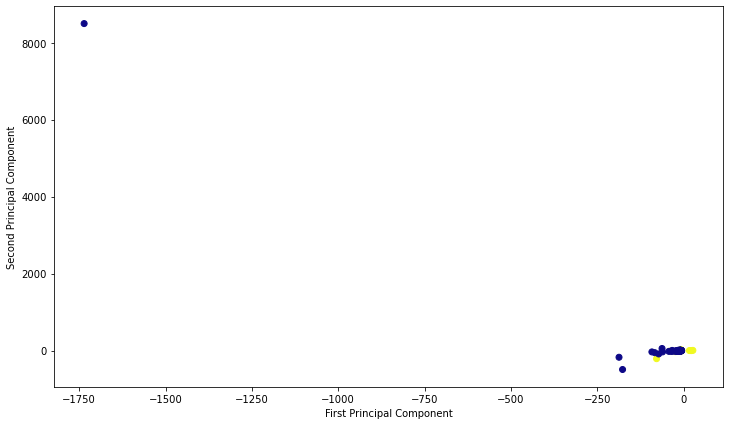

In [160]:
plt.figure(figsize=(12,7))
plt.scatter(x_pca[:,0],x_pca[:,1],c=new_sub1['Target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

Text(0, 0.5, 'Second Principal Component')

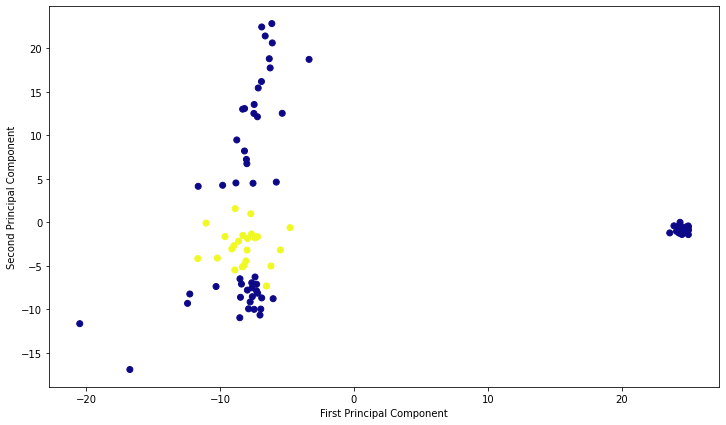

In [161]:
plt.figure(figsize=(12,7))
plt.scatter(x_pcaa[:,0],x_pcaa[:,1],c=new_sub2['Target'],cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

In [162]:
pca.components_

array([[ 0.06902196, -0.06782386,  0.06098728, ...,  0.0687575 ,
         0.06895757,  0.0687862 ],
       [-0.00347736,  0.01089108, -0.01570939, ..., -0.00680807,
        -0.00714275, -0.00651761],
       [ 0.01654998, -0.01831099,  0.0129916 , ...,  0.0237954 ,
         0.01438415,  0.02376182],
       ...,
       [ 0.00430553,  0.01307075, -0.01969567, ...,  0.00301046,
        -0.00260428,  0.00227447],
       [ 0.00718844,  0.01482726, -0.00950092, ...,  0.00237965,
         0.00604334,  0.00233441],
       [-0.00061721, -0.00613977,  0.01092273, ...,  0.00023479,
         0.00346863, -0.0015375 ]])

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X_train, y_train = X, new_sub1['Target']
print(X_train.shape,y_train.shape)

(188, 30) (188,)


In [165]:
X_test, y_test = x, new_sub2['Target']
print(X_test.shape,y_test.shape)

(96, 30) (96,)


In [166]:
print(f'Dataset: Train={X_train.shape[0]}, Test={X_test.shape[0]}')

Dataset: Train=188, Test=96


In [167]:
X = X
y = new_sub1['Target']
X_train = X
y_train = new_sub1['Target']
X_test = x
y_test = new_sub2['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=101)

## Using Support Vector Machines (SVM)

In [168]:
from sklearn.svm import SVC

In [169]:
model = SVC()

In [170]:
model.fit(X_train,y_train)

SVC()

In [171]:
predictions = model.predict(X_test)

In [172]:
from sklearn.metrics import classification_report,confusion_matrix

In [173]:
from sklearn.metrics import accuracy_score

In [174]:
score_test = accuracy_score(y_test,predictions)
score_test

0.6808510638297872

In [255]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[35  0]
 [11  1]]


              precision    recall  f1-score   support

           0       0.76      1.00      0.86        35
           1       1.00      0.08      0.15        12

    accuracy                           0.77        47
   macro avg       0.88      0.54      0.51        47
weighted avg       0.82      0.77      0.68        47



## Using K-Nearest Neighbor

In [342]:
from sklearn.neighbors import KNeighborsClassifier

In [343]:
knn = KNeighborsClassifier(n_neighbors=1)

In [344]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [345]:
predictions = knn.predict(X_test)

In [346]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0], dtype=int64)

In [347]:
from sklearn.metrics import classification_report,confusion_matrix

In [348]:
score_test = accuracy_score(y_test,predictions)
score_test

0.8723404255319149

In [349]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[33  3]
 [ 3  8]]


              precision    recall  f1-score   support

           0       0.92      0.92      0.92        36
           1       0.73      0.73      0.73        11

    accuracy                           0.87        47
   macro avg       0.82      0.82      0.82        47
weighted avg       0.87      0.87      0.87        47

